In [8]:
!pip install kagglehub[pandas-datasets]

import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = ""

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "katianakontolati/classification-of-handwritten-greek-letters",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

C:\Users\dekih\AppData\Local\Temp\ipykernel_19524\249628778.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


ValueError: Unsupported file extension: ''. Supported file extensions are: .csv, .tsv, .json, .jsonl, .xml, .parquet, .feather, .sqlite, .sqlite3, .db, .db3, .s3db, .dl3, .xls, .xlsx, .xlsm, .xlsb, .odf, .ods, .odt

In [7]:
# import sys
# sys.path.append('/home/hillh6/.local/lib/python3.10/site-packages')

import kagglehub
from kagglehub import KaggleDatasetAdapter

import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import the training and testing images
train=kagglehub.dataset_load(KaggleDatasetAdapter.PANDAS,
    "katianakontolati/classification-of-handwritten-greek-letters",
    "train.csv",)
test=kagglehub.dataset_load(KaggleDatasetAdapter.PANDAS,
    "katianakontolati/classification-of-handwritten-greek-letters",
    "test.csv",)

# create arrays of the training and testing sets
train=np.array(train)
test=np.array(test)

# define data vs. labels for both sets
# we subtract 1 from all labels to label the letters as 0 through 23
train_labels=train[:,196]-np.ones(239)
train_images=train[:,:196]
test_labels=test[:,196]-np.ones(95)
test_images=test[:,:196]

# 10 train images per letter
print(np.shape(train_labels))
print(np.shape(train_images))

# 4 test images per letter
print(np.shape(test_labels))
print(np.shape(test_images))

# normalize the pixel values
train_images=train_images/255
test_images=test_images/255

ValueError: Error reading file: 'utf-8' codec can't decode byte 0xf9 in position 10: invalid start byte

In [5]:
# we may train a model using the vectorized data
model1 = models.Sequential([
    layers.Dense(96,activation='relu'),
    layers.Dense(24,activation='softmax')
])

opt = tf.keras.optimizers.Adam()
model1.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history1=model1.fit(train_images, train_labels, epochs=50, verbose=0)

plt.plot(np.arange(1,51),history1.history['loss'])
plt.title('Standard neural network training loss curve')
plt.xlabel('epochs')
plt.ylabel('training loss')

model1.evaluate(test_images,test_labels)

NameError: name 'train_images' is not defined

In [111]:
# Identify which letters are misclassified
for i in range(len(test_images)):
    if np.argmax(model1.predict(test_images,verbose=0)[i])!=test_labels[i]:
        print(
            'image #:',str(i)+', real label:',
            str(test_labels[i])+
            ', predicted label:',
            np.argmax(model1.predict(test_images,verbose=0)[i])
        )

image #: 3, real label: 1.0, predicted label: 4
image #: 14, real label: 3.0, predicted label: 2
image #: 38, real label: 9.0, predicted label: 21
image #: 50, real label: 12.0, predicted label: 19
image #: 60, real label: 15.0, predicted label: 6
image #: 63, real label: 16.0, predicted label: 11
image #: 69, real label: 17.0, predicted label: 0
image #: 83, real label: 21.0, predicted label: 9
image #: 87, real label: 22.0, predicted label: 20
image #: 90, real label: 22.0, predicted label: 20


0.0  - Alpha


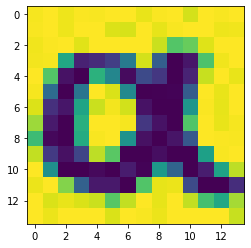

1.0  - Beta


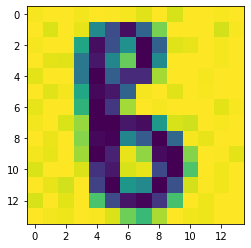

2.0  - Gamma


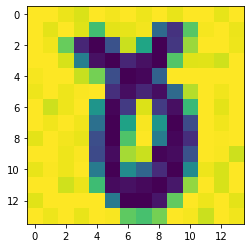

In [103]:
# train=kagglehub.dataset_load(KaggleDatasetAdapter.PANDAS,
#     "katianakontolati/classification-of-handwritten-greek-letters",
#     "train.csv",)
# test=kagglehub.dataset_load(KaggleDatasetAdapter.PANDAS,
#     "katianakontolati/classification-of-handwritten-greek-letters",
#     "test.csv",)
# train=np.array(train)
# test=np.array(test)
# train_labels=train[:,196]-np.ones(239)
# train_images=train[:,:196]
# test_labels=test[:,196]-np.ones(95)
# test_images=test[:,:196]
# train_images=train_images/255
# test_images=test_images/255

# we may reshape the vectors into 14x14 grid images to train a CNN
train_images=train_images.reshape(239,14,14,1)
test_images=test_images.reshape(95,14,14,1)

# some sample images
plt.imshow(train_images[0]) #alpha
print(train_labels[0],'- Alpha')
plt.show()
plt.imshow(train_images[10]) #beta
print(train_labels[10],'- Beta')
plt.show()
plt.imshow(train_images[19]) #gamma
print(train_labels[19],'- Gamma')
plt.show()

In [6]:
# reiterating our training and testing images, as 14x14 matrices
train=kagglehub.dataset_load(KaggleDatasetAdapter.PANDAS,
    "katianakontolati/classification-of-handwritten-greek-letters",
    "train.csv",)
test=kagglehub.dataset_load(KaggleDatasetAdapter.PANDAS,
    "katianakontolati/classification-of-handwritten-greek-letters",
    "test.csv",)
train=np.array(train); test=np.array(test)
train_labels=train[:,196]-np.ones(239); train_images=train[:,:196]
test_labels=test[:,196]-np.ones(95); test_images=test[:,:196]
train_images=train_images/255; test_images=test_images/255
train_images=train_images.reshape(239,14,14,1); test_images=test_images.reshape(95,14,14,1)

# Training a CNN
model2 = models.Sequential([
    # input 14x14 images
    layers.Input((14,14,1)),
    # 16 filters for the first layer
    layers.Conv2D(filters=16,kernel_size=7,activation='relu',padding='SAME'),
    # use max pooling to reduce to 7x7 images
    layers.MaxPooling2D(2),
    # 16 filters again
    layers.Conv2D(filters=16,kernel_size=7,activation='relu',padding='SAME'),
    # connected layers
    layers.Dense(units=32,activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(units=32,activation='relu'),
    # flatten and classify into 24 letters
    layers.Flatten(),
    layers.Dense(units=24,activation='softmax')
])

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history2=model2.fit(train_images, train_labels, epochs=20, verbose=0)
model2.evaluate(test_images,test_labels)
plt.plot(np.arange(1,21),history2.history['loss'])
plt.title('CNN loss curve, 20 epochs')
plt.xlabel('epochs')
plt.ylabel('model loss')

ValueError: Error reading file: 'utf-8' codec can't decode byte 0xf9 in position 10: invalid start byte

In [114]:
# Identify which letters are misclassified
for i in range(len(test_images)):
    if np.argmax(model2.predict(test_images,verbose=0)[i])!=test_labels[i]:
        print(
            'image #:',str(i)+', real label:',
            str(test_labels[i])+
            ', predicted label:',
            np.argmax(model2.predict(test_images,verbose=0)[i])
        )

image #: 3, real label: 1.0, predicted label: 7
image #: 17, real label: 4.0, predicted label: 2
image #: 35, real label: 9.0, predicted label: 10
image #: 38, real label: 9.0, predicted label: 10
image #: 60, real label: 15.0, predicted label: 6
image #: 61, real label: 15.0, predicted label: 6
image #: 69, real label: 17.0, predicted label: 0
image #: 76, real label: 19.0, predicted label: 12
image #: 83, real label: 21.0, predicted label: 9
image #: 87, real label: 22.0, predicted label: 20
image #: 90, real label: 22.0, predicted label: 20


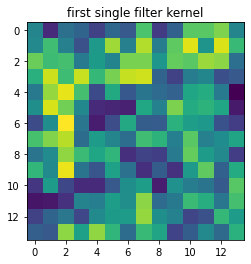

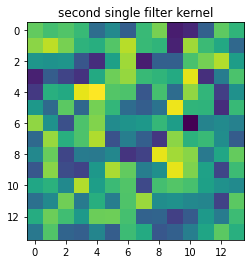

In [120]:
# Sample of a 1 filter kernel for visualization purposes
model3 = models.Sequential([
    layers.Input((14,14,1)),
    layers.Conv2D(filters=1,kernel_size=14,activation='relu',padding='SAME'),
    layers.MaxPooling2D(2),
    layers.Conv2D(filters=1,kernel_size=14,activation='relu',padding='SAME'),
    layers.Dense(units=32,activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(units=32,activation='relu'),
    layers.Flatten(),
    layers.Dense(units=24,activation='softmax')
])

model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model3.fit(train_images, train_labels, epochs=20, verbose=0)

# find the first convolution kernel
conv1=model3.get_weights()[0]
conv1=np.reshape(conv1,(14,14))

# find the second convolution kernel
conv2=model3.get_weights()[2]
conv2=np.reshape(conv2,(14,14))

plt.imshow(conv1); plt.title('first single filter kernel'); plt.show()
plt.imshow(conv2); plt.title('second single filter kernel');plt.show()